## PRÁTICA INDEPENDENTE: Scikit_Learn_Stats_Models - Solução.


### Exercícios

Recriar os modelos estudados na prática guiada (M3A20-PRATICA_GUIADA_PROFESSOR__Scikit_Learn_Stats_Models) que usaram `scikit learn` com `statsmodels`:

    1 - usando LSTAT;
    2 - usando RM e LSTAT;
    3 - usando todas as variáveis.

Comparem os gráficos e os EMQ.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


# Tamanho padrões das figuras e a fonte de seus textos neste notebook
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

In [2]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(data.data, 
                  columns = data.feature_names
                 )

# Colocamos a variável dependente (preço das casas -- MEDV) em outro DataFrame
dependente = pd.DataFrame(data.target, 
                       columns = ["MEDV"]
                      )

# Primeiras cinco linhas do dataframe com as variáveis independentes
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


####Função que treina um modelo linear e retorna:

1) o intercepto da regressão linear;

2) o(s) beta(s) de cada variável independente em relação à dependente;

3) R² métrica de avaliação da explicabilidade (de 0 a 1, sendo 1 a melhor explicabilidade possível);

4) erro medio do modelo (quadrático (bom para destaque de outliers) e absoluto(bom para interpretabilidade na unidade da variável resposta);

5) plot da distância das previsões dos valores reais;

In [6]:
def sumario_regressao_linear(var_ind, var_resp):

  X = var_ind
  y = var_resp

  #Instanciando um objeto LinearRegression
  lm = linear_model.LinearRegression(fit_intercept= True)

  #Variável com o treinamento do modelo
  modelo = lm.fit(X, y)

  #Predições do modelo de regressão linear treinado
  predicoes = lm.predict(X)

  coeficientes = list(zip(X.columns, modelo.coef_))
  
  #Imprimindo os resultados - estimadores Beta
  print('Estimadores Beta:')
  print("Intercepto beta_constante: ", modelo.intercept_) #Valor constante do preço independente da variação das variáveis independentes
  
  #Quando uma unidade é somada na variável independente em questão, qual atendência de comportamento da variável resposta?
  for coeficiente in coeficientes: 
    print(f'Inclinação beta_{coeficiente[0]}: {coeficiente[1]}')
  

  print()
  print('Métricas de avaliação do modelo:')
  
  #Métrica R² que nos indica o quanto nossa(s) variáve(is)l independente(s) est(ão)a explicando nossa variável dependente
  print('R² = ', modelo.score(X, y)) #De 0 a 1, onde 1 indica o nível mais alto de explicação

  #Métrica erro quadrático medio que nos indica o quanto as previsões do modelo estão se afastando em media dos valores reais
  print(f'EQM = {mean_squared_error(y, predicoes)}')

  #Métrica erro absoluto medio que nos indica o quanto as previsões do modelo estão se afastando em media dos valores reais na unidade da variavel resposta
  print(f'EAM = {mean_absolute_error(y, predicoes)}')

  #Plot das distâncias entre as previsões e os valores reais
  print()
  plt.plot(y, 
         y, 
         '-.', 
         c = 'blue'
        )

  plt.scatter(predicoes, 
            y, 
            s = 30, 
            c = 'r', 
            marker = 'o', 
            zorder = 10
           )
  plt.xlabel(f"Previsões de {str(y.name)} usando {list(X.columns)}" )
  plt.ylabel(f"Valores reais {str(y.name)}");

#### Exercício 1: Usando `'LSTAT'`.

Estimadores Beta:
Intercepto beta_constante:  34.5538408793831
Inclinação beta_LSTAT: -0.9500493537579906

Métricas de avaliação do modelo:
R² =  0.5441462975864797
EQM = 38.48296722989415
EAM = 4.505281166250568



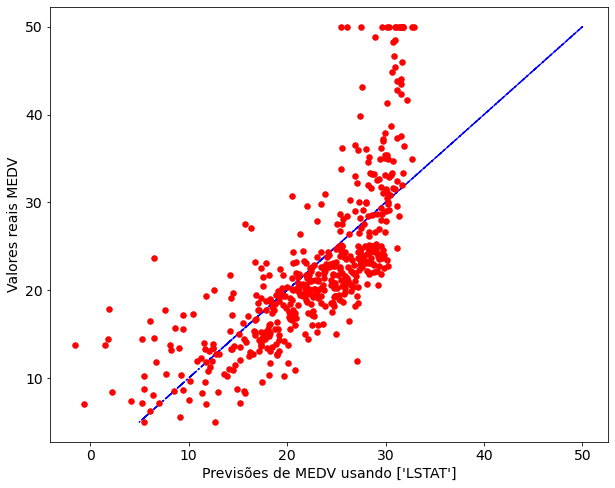

In [10]:
sumario_regressao_linear(var_ind= df[["LSTAT"]], var_resp= dependente['MEDV'])

Com a mudança de uma unidade em LSTAT há a variação de -0.95 no preço das casas, isto é, elas diminuem (apesar de bem pouco) o seu preço quanto mais "baixo" o status da população da região (este aspecto é levantado no final do notebook).

Podemos perceber que os estão bem esparsos em relação a linha azul no gráfico. Isto nos indica problemas nas predições feitas pelo modelo utilizando a variável LSTAT. Se os pontos estivessem mais próximos da linha, o modelo estava com predições mais acertadas. Junto a isso temos o R² nos indicando um nível de explicação de 54% da variável independente (LSTAT) em relação à variável dependente (preço das casas) o que nos indica um baixo nível de explicação a nivel linear.

#### Exercício 2: Usando `'LSTAT'` e `'RM'``

Estimadores Beta:
Intercepto beta_constante:  -1.3582728118745102
Inclinação beta_LSTAT: -0.6423583342441292
Inclinação beta_RM: 5.094787984336541

Métricas de avaliação do modelo:
R² =  0.6385616062603404
EQM = 30.512468777299468
EAM = 3.952580067119265



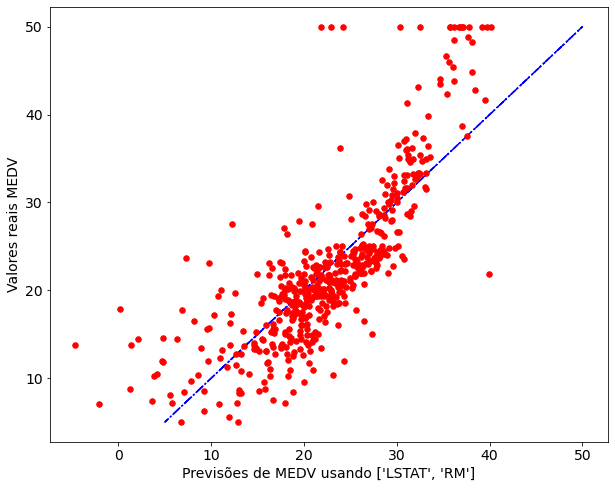

In [11]:
sumario_regressao_linear(var_ind= df[["LSTAT", 'RM']], var_resp= dependente['MEDV'])

Utilizando LSTAT e RM podemos perceber que o nível de explicação do modelo é maior, de 63% aproximadamente.

A variação dos preços de acordo uma unidade em LSTAT também é menor: de -0.94 para -0.64 aproximadamente: o que nos indica sempre a necessidade de olhar possíveis inter-relações entre as variáveis independentes.

Outro aspecto importante a ser ressaltado é a variação do preços das casas de acordo com o número de quartos medios (RM). Pra cada unidade aumentada em número de quartos medios, temos um acréscimo de 5.094 no preço das casas, o que faz sentido tendo em vista que casas com mais quartos tendem a valer mais.

#### Exercício 3: Com todas as variáveis como preditoras.

Variável CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

Temos uma variável categórica nos dados, porém, como ela está em forma binária (0 e 1), o modelo consegue compreender que é uma variável categórica. Se tivéssemos uma variável a partir 3 categorias pra cima representadas por números inteiros ou reais, primeiro teríamos de transformá-las em variáveis Dummies para que o modelo a entendesse como categorias e não variáveis quantitativas. Assim, ele conseguiria fazer as predições levando isto em conta e não interpretando variáveis categóricas como quantitativas (fazendo contas com elas).



Estimadores Beta:
Intercepto beta_constante:  36.459488385090125
Inclinação beta_CRIM: -0.10801135783679545
Inclinação beta_ZN: 0.04642045836688176
Inclinação beta_INDUS: 0.02055862636707862
Inclinação beta_CHAS: 2.6867338193448966
Inclinação beta_NOX: -17.766611228300167
Inclinação beta_RM: 3.809865206809212
Inclinação beta_AGE: 0.0006922246403425021
Inclinação beta_DIS: -1.475566845600255
Inclinação beta_RAD: 0.30604947898517226
Inclinação beta_TAX: -0.01233459391657437
Inclinação beta_PTRATIO: -0.9527472317072923
Inclinação beta_B: 0.009311683273793711
Inclinação beta_LSTAT: -0.5247583778554923

Métricas de avaliação do modelo:
R² =  0.7406426641094095
EQM = 21.894831181729202
EAM = 3.270862810900316



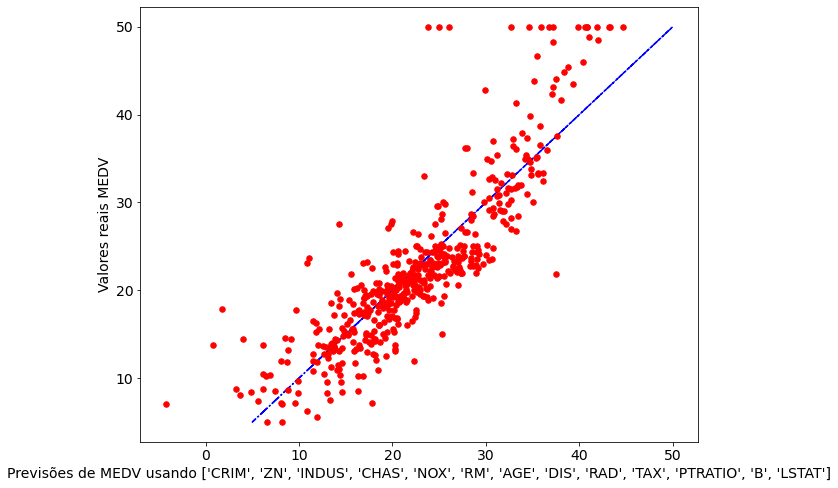

In [12]:
sumario_regressao_linear(var_ind= df, var_resp= dependente['MEDV'])

O R² do modelo sobe para 74% de explicação. 

É importante também ressaltarmos que as variáveis que utilizamos nos exercícios 1 e 2 (LSTAT e RM) mudam seus graus de "influência" no preço das casas quando utilizadas juntas com outras variáveis. Por isso é importante termos cuidado ao analisarmos algumas métricas com variáveis isoladas e precisamos compreender a significância real da métrica mesmo em outros contexto (como na utilização de todas as variáveis no modelo).

Notemos também alguns pontos ainda esparsos no gráfico, o que pode nos indicar que temos variáveis que os expliquem, porém que não temos em nossos dados, ou possíveis outliers a serem investigados para os dar um melhor tratamento. Uma possibilidade é criar dois modelos baseado em condições diferentes das variáveis para aumentar o nível de acurácia de acordo com as características das nossas variáveis independentes.

####Conclusões

  NOTA:

É importante ressaltarmos a importância das variáveis B e LSTAT que dizem respeito à quantidade de pessoas negras e baixo "Nível" da população na região, respectivamente. Quando implementamos um algoritmo de aprendizado de máquina estamos visando que decisões sejam tomadas pela empresa baseado em retornos de valores/classificações (em aprendizados supervisionados) pelo algoritmo.

Neste caso, o que estaríamos pedindo para o modelo calcular é o preço (valor de algo, das casas neste caso) baseado em questões sociais graves (como a raça e a classe dos sujeitos que compõem determinada região). Nesse sentido, estaríamos valorando um objeto baseado em concepções que eram comuns ao período (o dataset provem da sociedade americana da década de 1940), mas que precisamos combater no presente e não mantê-las e reforçá-las através das máquinas. 

Assim, mesmo que o modelo tivesse uma explicação melhor com essas variáveis, a decisão seria somente utilizá-las para analisar a sociedade de então, e nunca valorar algo baseado nessas características (raciais) e estados (financeiros) de pessoas.

In [13]:
df.drop(columns= ['B', 'LSTAT'], inplace= True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


Estimadores Beta:
Intercepto beta_constante:  27.152367864829426
Inclinação beta_CRIM: -0.184032123019529
Inclinação beta_ZN: 0.03909990454067012
Inclinação beta_INDUS: -0.042324497280890355
Inclinação beta_CHAS: 3.4875282612727583
Inclinação beta_NOX: -22.182109527940515
Inclinação beta_RM: 6.075744253235578
Inclinação beta_AGE: -0.045188052175105534
Inclinação beta_DIS: -1.583852201757661
Inclinação beta_RAD: 0.2547219601331504
Inclinação beta_TAX: -0.012212624668098228
Inclinação beta_PTRATIO: -0.9962061566032534

Métricas de avaliação do modelo:
R² =  0.6703140875272768
EQM = 27.831938401887733
EAM = 3.528953714684493



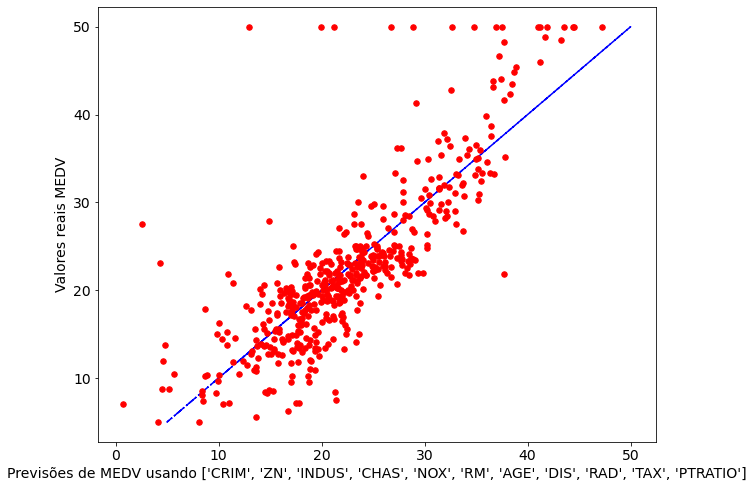

In [14]:
sumario_regressao_linear(var_ind= df, var_resp= dependente['MEDV'])

Neste caso teríamos um modelo com Erro Medio absoluto bem similar e explicação de 67% (o que não é ruim tendo em vista que ainda iríamos fazer a otimização do modelo).